In [26]:
print("hello")

hello


In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("csv-excel-files/shoe_sales.csv")

In [31]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [37]:
df[df.sold_qty > 19.75].count()

date        15
brand       15
sold_qty    15
dtype: int64

In [38]:
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [39]:
df_nike = df[df.brand =="Nike"]

In [43]:
df_nike.isnull()

,date,brand,sold_qty
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False
10,False,False,False
12,False,False,False
14,False,False,False
16,False,False,False
18,False,False,False


In [45]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [54]:
val = round(df_nike.sold_qty.mean())
val

20

In [55]:
df_nike.sold_qty.fillna(val, inplace=True)

/var/folders/kp/_lmry29d6xj13k1_dsxljwtr0000gn/T/ipykernel_39396/3809410123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike.sold_qty.fillna(val, inplace=True)
/var/folders/kp/_lmry29d6xj13k1_dsxljwtr0000gn/T/ipykernel_39396/3809410123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val, inplace=True)


In [56]:
df_nike.loc[[32, 48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [57]:
df_adidas = df[df.brand == "Adidas"]

In [58]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [59]:
df_adidas.sold_qty.sum()

np.float64(1044.0)

In [62]:
df_adidas.sold_qty.quantile([.95])


0.95    18.55
Name: sold_qty, dtype: float64

In [69]:
df_adidas[df_adidas.sold_qty> 18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


/var/folders/kp/_lmry29d6xj13k1_dsxljwtr0000gn/T/ipykernel_39396/1328701930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike['date'] = pd.to_datetime(df_nike['date'])
/var/folders/kp/_lmry29d6xj13k1_dsxljwtr0000gn/T/ipykernel_39396/1328701930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas['date'] = pd.to_datetime(df_adidas['date'])


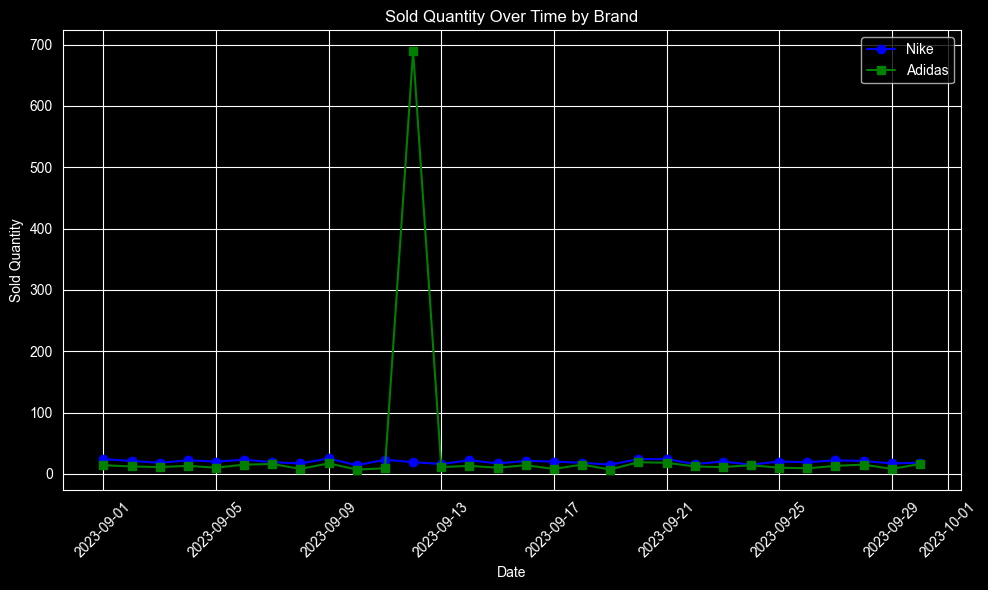

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime
df_nike['date'] = pd.to_datetime(df_nike['date'])
df_adidas['date'] = pd.to_datetime(df_adidas['date'])

# Sort by date (optional but recommended)
df_nike = df_nike.sort_values('date')
df_adidas = df_adidas.sort_values('date')

# Plot
plt.figure(figsize=(10,6))

plt.plot(df_nike['date'], df_nike['sold_qty'], marker='o', label='Nike', color='blue')
plt.plot(df_adidas['date'], df_adidas['sold_qty'], marker='s', label='Adidas', color='green')

plt.title('Sold Quantity Over Time by Brand')
plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
df_adidas.sold_qty.replace(689,df_adidas.sold_qty.median() , inplace=True)

/var/folders/kp/_lmry29d6xj13k1_dsxljwtr0000gn/T/ipykernel_39396/710345430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas.sold_qty.replace(689,df_adidas.sold_qty.median() , inplace=True)


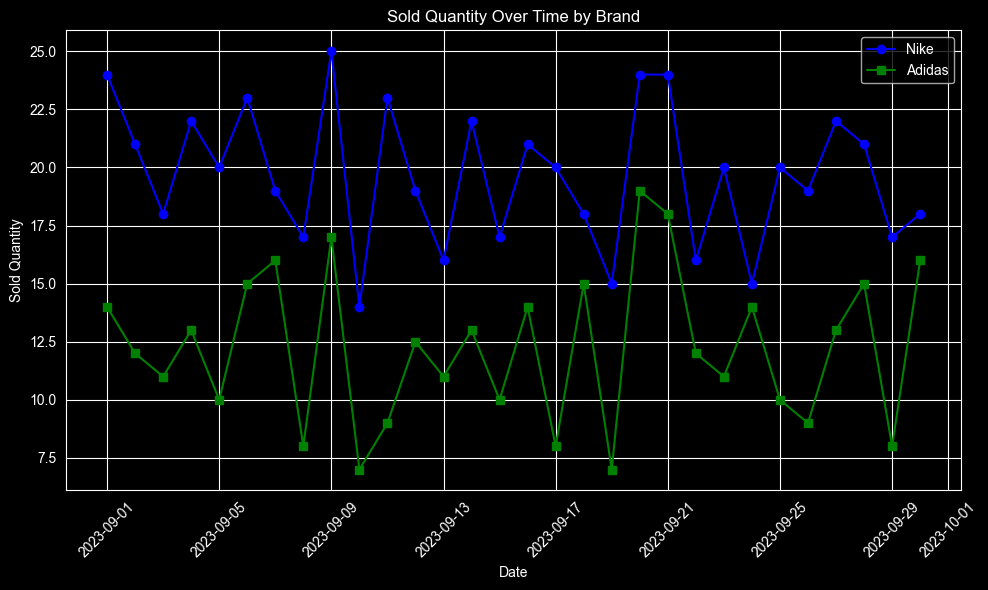

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime
df_nike['date'] = pd.to_datetime(df_nike['date'])
df_adidas['date'] = pd.to_datetime(df_adidas['date'])

# Sort by date (optional but recommended)
df_nike = df_nike.sort_values('date')
df_adidas = df_adidas.sort_values('date')

# Plot
plt.figure(figsize=(10,6))

plt.plot(df_nike['date'], df_nike['sold_qty'], marker='o', label='Nike', color='blue')
plt.plot(df_adidas['date'], df_adidas['sold_qty'], marker='s', label='Adidas', color='green')

plt.title('Sold Quantity Over Time by Brand')
plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
